# Linear Regression model using Salary Dataset

In [1]:
#importing the libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.isnull().sum()

In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## EDA

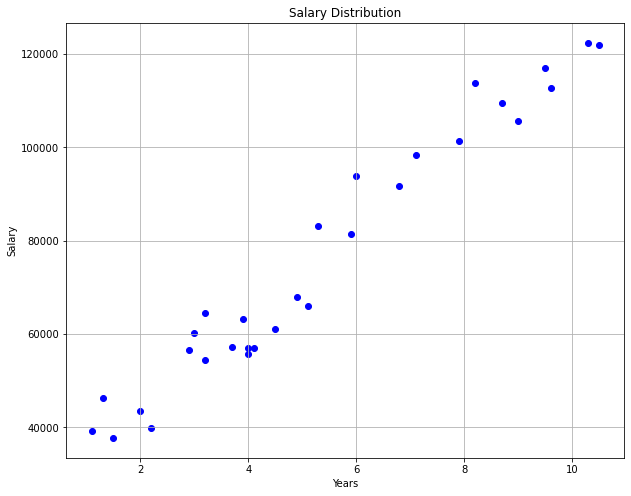

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(df.YearsExperience,df.Salary,color ="blue")
plt.title('Salary Distribution')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

### Linear Regression Model

In [7]:
##Train Test split
from sklearn.model_selection import train_test_split
X = df['YearsExperience'] # Independet variable
y = df['Salary'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [8]:
X_train

24     8.7
22     7.9
23     8.2
4      2.2
2      1.5
25     9.0
6      3.0
18     5.9
13     4.1
7      3.2
27     9.6
1      1.3
16     5.1
0      1.1
15     4.9
29    10.5
28    10.3
9      3.7
8      3.2
12     4.0
11     4.0
5      2.9
Name: YearsExperience, dtype: float64

In [9]:
X_test

17    5.3
21    7.1
10    3.9
19    6.0
14    4.5
20    6.8
26    9.5
3     2.0
Name: YearsExperience, dtype: float64

In [10]:
X_train = np.array(X_train).reshape(-1, 1) #Converting 1D to 2D array
X_test = np.array(X_test).reshape(-1, 1)

In [11]:
len(X_train),len(X_test)

(22, 8)

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
# LR model
lm = LinearRegression() #lm = LinearRegression(fit_intercept=True)#
lm.fit(X_train,y_train) #Fitting model
print(lm.score(X_train,y_train)) # Score is accuracy in which 1 is accurate

0.9631627885810901


In [14]:
# Y=mX + b
# m is coef
# b is intercept
print(lm.coef_)
print(lm.intercept_)

[9261.56845302]
25892.305719071206


In [15]:
# Predicting the Salary for the Test values
y_pred = lm.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 40884620.50478405
Mean Absolute Error (MAE): 5215.55372271297


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
y_train_pred = lm.predict(X_train)

mse = mean_squared_error(X_train, y_train_pred)
mae = mean_absolute_error(X_train, y_train_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 6241608705.2672615
Mean Absolute Error (MAE): 74005.1681818182


In [18]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score
# Calculate R square vale
rsq = r2_score(y_test,y_pred)
print('r square :',rsq)

r square : 0.9180980074804028


In [19]:
# Feature scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['YearsExperience']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame 'data' with the "Salary" column
# You can extract the "Salary" column as follows:
salary_column = df["Salary"]

# Create a StandardScaler object and perform standardization directly
scaler = StandardScaler()
salary_standardized = scaler.fit_transform(salary_column.values.reshape(-1, 1))

# Create a new column in the DataFrame for the standardized "Salary"
df["Salary_Standardized"] = salary_standardized

In [22]:
df

,YearsExperience,Salary,Salary_Standardized
0,0.000000,39343.0,-1.360113
1,0.021277,46205.0,-1.105527
2,0.042553,37731.0,-1.419919
3,0.095745,43525.0,-1.204957
4,0.117021,39891.0,-1.339781
5,0.191489,56642.0,-0.718307
6,0.202128,60150.0,-0.588158
7,0.223404,54445.0,-0.799817
8,0.223404,64445.0,-0.428810
9,0.276596,57189.0,-0.698013


In [23]:
##Train Test split
from sklearn.model_selection import train_test_split
X = df['YearsExperience'] # Independet variable
y = df['Salary_Standardized'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [24]:
X_train = np.array(X_train).reshape(-1, 1) #Converting 1D to 2D array
X_test = np.array(X_test).reshape(-1, 1)

#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# LR model
lm = LinearRegression() #lm = LinearRegression(fit_intercept=True)#
lm.fit(X_train,y_train) #Fitting model
print(lm.score(X_train,y_train)) # Score is accuracy in which 1 is accurate

0.9631627885810901


In [25]:
# Y=mX + b
# m is coef
# b is intercept
print(lm.coef_)
print(lm.intercept_)

[3.22994261]
-1.481171144320892


In [26]:
# Predicting the Salary for the Test values
y_pred = lm.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.05627620378751455
Mean Absolute Error (MAE): 0.19350083104049481


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
y_train_pred = lm.predict(X_train)

mse = mean_squared_error(X_train, y_train_pred)
mae = mean_absolute_error(X_train, y_train_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.7616211330363787
Mean Absolute Error (MAE): 0.7855404054305798


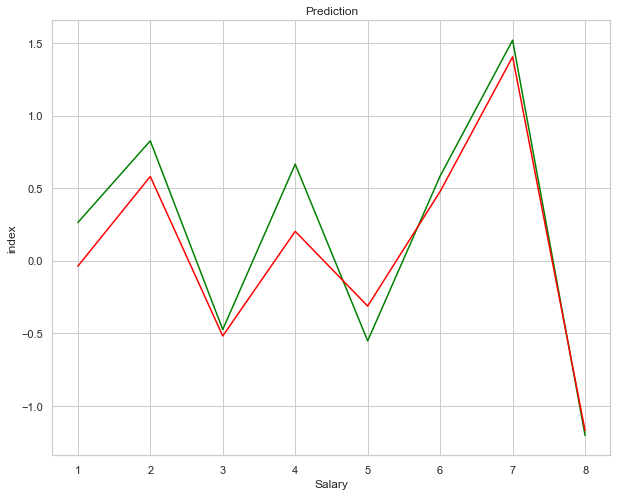

In [39]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='green')
plt.plot(c,y_pred,color='red')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

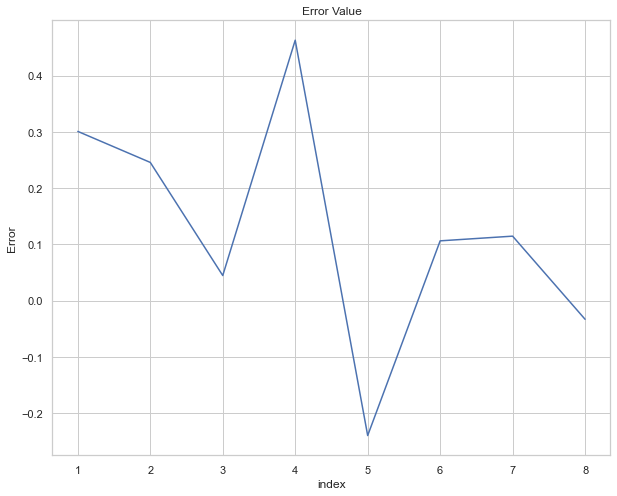

In [38]:
# plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,(y_test-y_pred))
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [42]:
n=input("Enter years of experience: ")
df[14:15] # To see the data in row
test_pass = np.array([n]).reshape(1,-1)     ## Change YearsExperience which is 3

print(lm.predict(test_pass)) #Predict Salary

Enter years of experience3
[8.20865669]
